In [1]:
import requests
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
url = 'http://localhost:8080/conversations'
all_data = requests.get(url)
print(type(all_data))
all_data = all_data.json()
print(type(all_data))

<class 'requests.models.Response'>
<class 'list'>


In [13]:
all_data

[{'user': 'Luke Skywalker',
  'channel': 'Light Side',
  'text': "Hey! what's up Obiwan? Where are you?"},
 {'user': 'Obiwan',
  'channel': 'Light Side',
  'text': "Hi kiddo! I'm in Tatooine looking for a transport"},
 {'user': 'Chewbacca',
  'channel': 'Smugglers',
  'text': 'UUUURR AHHAGR UUHGHAA GRRAAAHUU'},
 {'user': 'Han Solo',
  'channel': 'Smugglers',
  'text': "I know Chewy, Tatooine isn't the best place to park our transport. But we don't have choice."},
 {'user': 'Luke Skywalker',
  'channel': 'Light Side',
  'text': 'May the force be with us'}]

In [42]:
users_chats = {}
for data in all_data:
    users_chats.setdefault(data['user'], []).append(data['text'])
    

In [43]:
users_chats

{'Luke Skywalker': ["Hey! what's up Obiwan? Where are you?",
  'May the force be with us'],
 'Obiwan': ["Hi kiddo! I'm in Tatooine looking for a transport"],
 'Chewbacca': ['UUUURR AHHAGR UUHGHAA GRRAAAHUU'],
 'Han Solo': ["I know Chewy, Tatooine isn't the best place to park our transport. But we don't have choice."]}

In [44]:
for k, v in users_chats.items():
    users_chats[k]= ' '.join(v)

In [45]:
users_chats

{'Luke Skywalker': "Hey! what's up Obiwan? Where are you? May the force be with us",
 'Obiwan': "Hi kiddo! I'm in Tatooine looking for a transport",
 'Chewbacca': 'UUUURR AHHAGR UUHGHAA GRRAAAHUU',
 'Han Solo': "I know Chewy, Tatooine isn't the best place to park our transport. But we don't have choice."}

In [46]:
count_vectorizer = CountVectorizer(stop_words='english')
sparse_matrix = count_vectorizer.fit_transform(users_chats.values())
sparse_matrix

<4x20 sparse matrix of type '<class 'numpy.int64'>'
	with 22 stored elements in Compressed Sparse Row format>

In [48]:
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=users_chats.keys())
display(df)

,ahhagr,best,chewy,choice,don,force,grraaahuu,hey,hi,isn,kiddo,know,looking,obiwan,park,place,tatooine,transport,uuhghaa,uuuurr
Luke Skywalker,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
Obiwan,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0
Chewbacca,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
Han Solo,0,1,1,1,1,0,0,0,0,1,0,1,0,0,1,1,1,1,0,0


In [49]:
from sklearn.metrics.pairwise import cosine_similarity as distance
import numpy as np

In [51]:
similarity_matrix = distance(df, df)
sim_df = pd.DataFrame(similarity_matrix, columns=users_chats.keys(), index=users_chats.keys())
np.fill_diagonal(sim_df.values, 0)

In [55]:
sim_df.idxmax()

Luke Skywalker    Luke Skywalker
Obiwan                  Han Solo
Chewbacca         Luke Skywalker
Han Solo                  Obiwan
dtype: object

AxesSubplot(0.125,0.125;0.62x0.755)


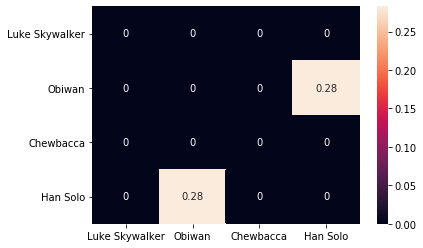

In [58]:
import seaborn as sns
print(sns.heatmap(sim_df,annot=True))

In [59]:
users_chats


{'Luke Skywalker': "Hey! what's up Obiwan? Where are you? May the force be with us",
 'Obiwan': "Hi kiddo! I'm in Tatooine looking for a transport",
 'Chewbacca': 'UUUURR AHHAGR UUHGHAA GRRAAAHUU',
 'Han Solo': "I know Chewy, Tatooine isn't the best place to park our transport. But we don't have choice."}

In [67]:
sid = SentimentIntensityAnalyzer()

users_sentiments = {}

for user in users_chats:
    users_sentiments[user] = sid.polarity_scores(users_chats[user])
    

In [73]:
users_sentiments

{'Luke Skywalker': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'Obiwan': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'Chewbacca': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'Han Solo': {'neg': 0.183, 'neu': 0.817, 'pos': 0.0, 'compound': -0.5216}}

In [76]:
users_sent = {}
for keys, values in users_sentiments.items():
    for k, v in values.items():
        if k == 'compound':
            users_sent[keys] = v
        

In [77]:
users_sent

{'Luke Skywalker': 0.0, 'Obiwan': 0.0, 'Chewbacca': 0.0, 'Han Solo': -0.5216}

In [81]:
users_join_side={}
for k, v in users_sent.items():
    if v > 0:
        users_join_side[k]= 'Light Side'
    elif v < 0:
        users_join_side[k]= 'Dark Side'
    else:
        users_join_side[k] = 'Not defined'
        

In [82]:
users_join_side

{'Luke Skywalker': 'Not defined',
 'Obiwan': 'Not defined',
 'Chewbacca': 'Not defined',
 'Han Solo': 'Dark Side'}

In [63]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ovi/nltk_data...


True